In [1]:

import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Alec1').getOrCreate()


In [2]:
df = spark.read.load('waste111.csv', format='csv',header='true')

In [3]:
df.describe().show()

+-------+---------------------+-----------------+------------+------------------+--------------------+
|summary|Total waste generated|             Year|  Waste Type|    Waste disposed|Total waste recycled|
+-------+---------------------+-----------------+------------+------------------+--------------------+
|  count|                 2509|             2520|        2520|              2520|                2508|
|   mean|   460951.03668261564|           2010.0|        null|198063.80952380953|  263169.77671451354|
| stddev|    424859.3556755318|4.321351294987318|        null| 232769.6413595158|   385784.1671937681|
|    min|                    "|             2003|Ash & Sludge|             10100|                   0|
|    max|                98300|             2017| Wood/Timber|             99100|               99200|
+-------+---------------------+-----------------+------------+------------------+--------------------+



In [4]:
for field in df.schema.fields:
    print(field.name +" , "+str(field.dataType))

Total waste generated , StringType()
Year , StringType()
Waste Type , StringType()
Waste disposed , StringType()
Total waste recycled , StringType()


In [5]:
for col in df.dtypes:
    print(col[0]+" , "+col[1])

Total waste generated , string
Year , string
Waste Type , string
Waste disposed , string
Total waste recycled , string


In [6]:
df.columns

['Total waste generated',
 'Year',
 'Waste Type',
 'Waste disposed',
 'Total waste recycled']

In [7]:
row = df.count()
col = len(df.columns)
print(f'number of rows: {row}')
print(f'columns: {col}')

number of rows: 2521
columns: 5


In [8]:
# Import the pandas library.
import pandas
# Import matplotlib
import matplotlib.pyplot as plt
#import numpy
import numpy as np
#import seaborn as sns
import seaborn as sns

In [9]:
table=df.toPandas()


In [10]:
table.shape

(2521, 5)

In [11]:
# define method to check and visualise data
from pyspark.sql.functions import col
def check_status(field):
    field_table=table[field]
    field_table=pandas.to_numeric(field_table)
    df2 = df.withColumn(field,
        col(field).cast('double'))
    df2.select(field).describe().show()
    print('skewness: ', field_table.skew())
    plt.hist(field_table)
    return

In [12]:
from pyspark.sql.functions import col
df = df.withColumn('Year',
        col('Year').cast('double'))
df.select('Year').describe().show()

df = df.withColumn('Total waste generated',
        col('Total waste generated').cast('double'))
df.select('Total waste generated').describe().show()

df = df.withColumn('Waste disposed',
        col('Waste disposed').cast('double'))
df.select('Waste disposed').describe().show()

df = df.withColumn('Total waste recycled',
        col('Total waste recycled').cast('double'))
df.select('Total waste recycled').describe().show()

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|             2520|
|   mean|           2010.0|
| stddev|4.321351294987318|
|    min|           2003.0|
|    max|           2017.0|
+-------+-----------------+

+-------+---------------------+
|summary|Total waste generated|
+-------+---------------------+
|  count|                 2508|
|   mean|   460951.03668261564|
| stddev|    424859.3556755318|
|    min|              14400.0|
|    max|            1695300.0|
+-------+---------------------+

+-------+------------------+
|summary|    Waste disposed|
+-------+------------------+
|  count|              2520|
|   mean|198063.80952380953|
| stddev| 232769.6413595158|
|    min|            1300.0|
|    max|          789000.0|
+-------+------------------+

+-------+--------------------+
|summary|Total waste recycled|
+-------+--------------------+
|  count|                2508|
|   mean|  263169.77671451354|
| stddev|   385784.1671937681|
|    min| 

In [13]:
table=df.toPandas()

In [14]:
table.dtypes

Total waste generated    float64
Year                     float64
Waste Type                object
Waste disposed           float64
Total waste recycled     float64
dtype: object

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

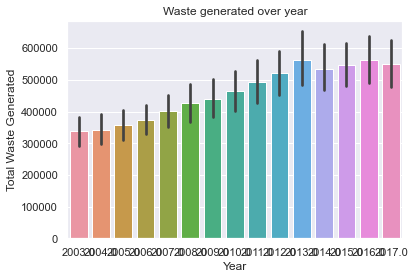

In [15]:
sns.set()
plt.figure()

ax = sns.barplot(data=table, x="Year", y="Total waste generated")

##Display
ax.set_title('Waste generated over year')
ax.set_ylabel('Total Waste Generated')
ax.set_xlabel('Year')
ax.set_xticklabels(table["Year"].unique().astype(str), rotation='vertical')

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

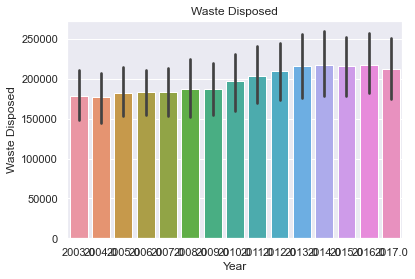

In [16]:
##Total Waste disposed
sns.set()
plt.figure()
ax = sns.barplot(data=table, x="Year", y="Waste disposed")

#Display
ax.set_title('Waste Disposed')
ax.set_ylabel('Waste Disposed')
ax.set_xlabel('Year')
ax.set_xticklabels(table["Year"].unique().astype(str), rotation='vertical')


ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (16).

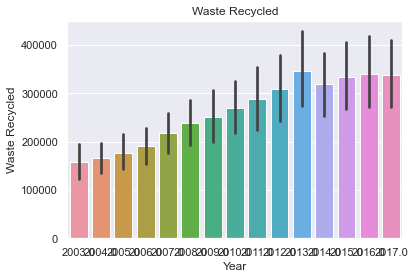

In [17]:
##Total Waste Recycled
sns.set()
plt.figure()
ax = sns.barplot(data=table, x="Year", y="Total waste recycled")

##Display
ax.set_title('Waste Recycled')
ax.set_ylabel('Waste Recycled')
ax.set_xlabel('Year')
ax.set_xticklabels(table["Year"].unique().astype(str), rotation='vertical')

In [18]:
plt.show()

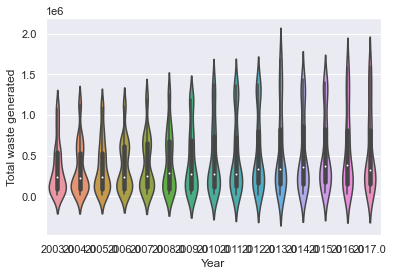

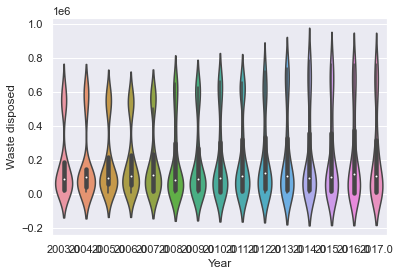

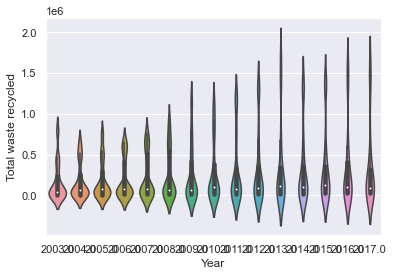

In [19]:
##Violinplot
##The violin plot is one of the data visualisation method which shows the density of the data plot
##Set Plot size for all plots
sns.set()
##Plotting
##Total waste generated
sns.violinplot(x="Year",y="Total waste generated", 
               data=table);
plt.show()

##Waste disposed
sns.violinplot(x="Year",y="Waste disposed", 
               data=table);
plt.show()


##Total waste recycled
sns.violinplot(x="Year",y="Total waste recycled", 
               data=table);
plt.show()

In [20]:
#check missing values
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---------------------+----+----------+--------------+--------------------+
|Total waste generated|Year|Waste Type|Waste disposed|Total waste recycled|
+---------------------+----+----------+--------------+--------------------+
|                   13|   1|         1|             1|                  13|
+---------------------+----+----------+--------------+--------------------+



In [21]:
df=df.na.drop(subset=["Total waste generated","Year","Waste Type","Waste disposed","Total waste recycled"])

In [22]:
from pyspark.sql.functions import col,isnan, when, count
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---------------------+----+----------+--------------+--------------------+
|Total waste generated|Year|Waste Type|Waste disposed|Total waste recycled|
+---------------------+----+----------+--------------+--------------------+
|                    0|   0|         0|             0|                   0|
+---------------------+----+----------+--------------+--------------------+



In [23]:
##Detect Outliers
df0=df.drop('Waste Type')
bounds = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in df0.columns
}


In [24]:
for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1'] - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3'] + (iqr * 1.5)
print(bounds)

{'Total waste generated': {'q1': 114400.0, 'q3': 725900.0, 'lower': -802850.0, 'upper': 1643150.0}, 'Year': {'q1': 2006.0, 'q3': 2014.0, 'lower': 1994.0, 'upper': 2026.0}, 'Waste disposed': {'q1': 21100.0, 'q3': 303600.0, 'lower': -402650.0, 'upper': 727350.0}, 'Total waste recycled': {'q1': 16100.0, 'q3': 361200.0, 'lower': -501550.0, 'upper': 878850.0}}


In [25]:
import pyspark.sql.functions as f
df01=df0.select(
    "*",
    *[
        f.when(
            f.col(c).between(bounds[c]['lower'], bounds[c]['upper']),
            0
        ).otherwise(1).alias(c+"_outliers") 
        for c in df0.columns
    ]
)

In [26]:
df01.groupBy().sum().collect()

[Row(sum(Total waste generated)=1152932000.0, sum(Year)=5018970.0, sum(Waste disposed)=494077600.0, sum(Total waste recycled)=658855600.0, sum(Total waste generated_outliers)=12, sum(Year_outliers)=0, sum(Waste disposed_outliers)=58, sum(Total waste recycled_outliers)=216)]

In [27]:
## Handling Outliers
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col



def get_stats(field):
    df_new = df.select(
        _mean(col(field)).alias('mean'),
        _stddev(col(field)).alias('std')
    ).collect()

    mean = df_new[0]['mean']
    std = df_new[0]['std']
    print(mean,std)
    return mean, std

In [28]:
get_stats('Total waste generated')

461726.87224669603 425274.00085596


(461726.87224669603, 425274.00085596)

In [29]:
from pyspark.sql import functions as F, Window
def replace_outliers(field):
    mean, std=get_stats(field)
    upper = mean + 2*std 
    lower = mean - 2*std

    df2 = df.withColumn(
        field, 
        F.when(
            (df[field] > upper) | (df[field] < lower), 
            F.round(F.mean(field).over(Window.orderBy(F.lit(1)))).cast('double')
            # or you can use 
            # F.round(F.lit(df_fill_miss.select(F.mean(F.col('a')).alias('mean')).collect()[0]['mean'])).cast('double')
        ).otherwise(F.col(field))
    )
    df2.select(field).describe().show()
    return df2

In [30]:
df=replace_outliers('Total waste generated')
df=replace_outliers('Waste disposed')
df=replace_outliers('Total waste recycled')

461726.87224669603 425274.00085596
+-------+---------------------+
|summary|Total waste generated|
+-------+---------------------+
|  count|                 2497|
|   mean|    404750.2955546656|
| stddev|    347249.2213251467|
|    min|              14400.0|
|    max|            1291800.0|
+-------+---------------------+

197868.48217861433 232443.84548080017
+-------+------------------+
|summary|    Waste disposed|
+-------+------------------+
|  count|              2497|
|   mean|170711.72286744093|
| stddev|197306.46967359612|
|    min|            1300.0|
|    max|          662300.0|
+-------+------------------+

263858.8706447737 386435.3106450128
+-------+--------------------+
|summary|Total waste recycled|
+-------+--------------------+
|  count|                2497|
|   mean|  180342.06167400882|
| stddev|  222965.78541342035|
|    min|                 0.0|
|    max|            912400.0|
+-------+--------------------+



In [31]:
##read new data
df_recycle = spark.read.load('recycled21.csv', format='csv',header='true')

In [32]:
df_recycle.columns

['Year', 'Waste Type', 'Recycling']

In [33]:
for col in df_recycle.dtypes:
    print(col[0]+" , "+col[1])

Year , string
Waste Type , string
Recycling , string


In [34]:
from pyspark.sql.functions import col
df_recycle = df_recycle.withColumn('Year',
        col('Year').cast('double'))
df_recycle.select('Year').describe().show()

df_recycle = df_recycle.withColumn('Recycling',
        col('Recycling').cast('double'))
df_recycle.select('Recycling').describe().show()

+-------+-----------------+
|summary|             Year|
+-------+-----------------+
|  count|             2520|
|   mean|           2010.0|
| stddev|4.321351294987318|
|    min|           2003.0|
|    max|           2017.0|
+-------+-----------------+

+-------+-------------------+
|summary|          Recycling|
+-------+-------------------+
|  count|               2503|
|   mean|0.47602077506991636|
| stddev| 0.3761350883447749|
|    min|                0.0|
|    max|               0.99|
+-------+-------------------+



In [35]:
table_re=df_recycle.toPandas()
table_re.dtypes

Year          float64
Waste Type     object
Recycling     float64
dtype: object

In [36]:
##join two data frame
df_final = df.join(df_recycle,['Year','Waste Type'])

In [37]:
df_final.columns

['Year',
 'Waste Type',
 'Total waste generated',
 'Waste disposed',
 'Total waste recycled',
 'Recycling']

In [38]:
#check missing values
from pyspark.sql.functions import col,isnan, when, count
df_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_final.columns]
   ).show()

+----+----------+---------------------+--------------+--------------------+---------+
|Year|Waste Type|Total waste generated|Waste disposed|Total waste recycled|Recycling|
+----+----------+---------------------+--------------+--------------------+---------+
|   0|         0|                    0|             0|                   0|      201|
+----+----------+---------------------+--------------+--------------------+---------+



In [39]:
df_final=df_final.na.drop(subset=["Recycling"])

from pyspark.sql.functions import col,isnan, when, count
df_final.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_final.columns]
   ).show()

+----+----------+---------------------+--------------+--------------------+---------+
|Year|Waste Type|Total waste generated|Waste disposed|Total waste recycled|Recycling|
+----+----------+---------------------+--------------+--------------------+---------+
|   0|         0|                    0|             0|                   0|        0|
+----+----------+---------------------+--------------+--------------------+---------+



In [40]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col



def get_stats(field):
    df_ff = df_final.select(
        _mean(col(field)).alias('mean'),
        _stddev(col(field)).alias('std')
    ).collect()

    mean = df_ff[0]['mean']
    std = df_ff[0]['std']
    print(mean,std)
    return mean, std


In [41]:
from pyspark.sql import functions as F, Window
def replace_outliers(field):
    mean, std=get_stats(field)
    upper = mean + 2*std 
    lower = mean - 2*std

    df3 = df_final.withColumn(
        field, 
        F.when(
            (df_final[field] > upper) | (df_final[field] < lower), 
            F.round(F.mean(field).over(Window.orderBy(F.lit(1)))).cast('double')
            # or you can use 
            # F.round(F.lit(df_fill_miss.select(F.mean(F.col('a')).alias('mean')).collect()[0]['mean'])).cast('double')
        ).otherwise(F.col(field))
    )
    df3.select(field).describe().show()
    return df3

In [42]:
df_final=replace_outliers('Recycling')

0.4768605315324256 0.37608845454088313
+-------+-------------------+
|summary|          Recycling|
+-------+-------------------+
|  count|              29763|
|   mean| 0.4768605315324256|
| stddev|0.37608845454088313|
|    min|                0.0|
|    max|               0.99|
+-------+-------------------+



[Text(0, 0, '2016.0'),
 Text(1, 0, '2015.0'),
 Text(2, 0, '2014.0'),
 Text(3, 0, '2013.0'),
 Text(4, 0, '2012.0'),
 Text(5, 0, '2011.0'),
 Text(6, 0, '2010.0'),
 Text(7, 0, '2009.0'),
 Text(8, 0, '2008.0'),
 Text(9, 0, '2007.0'),
 Text(10, 0, '2006.0'),
 Text(11, 0, '2005.0'),
 Text(12, 0, '2004.0'),
 Text(13, 0, '2003.0'),
 Text(14, 0, '2017.0')]

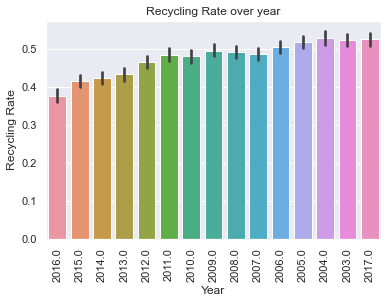

In [43]:
table22=df_final.toPandas()
sns.set()
plt.figure()

ax = sns.barplot(data=table22, x="Year", y="Recycling")

##Display
ax.set_title('Recycling Rate over year')
ax.set_ylabel('Recycling Rate')
ax.set_xlabel('Year')
ax.set_xticklabels(table22["Year"].unique().astype(str), rotation='vertical')

In [44]:
df_final1 = df_final.select(col('Year'),
                       col("Waste Type"), 
                       col('Total waste generated').alias('Waste Generated'),
                       col('Waste disposed'),
                           col("Total waste recycled").alias("Waste Recycled"),
                          col("Recycling").alias("Recycling Rate")
                      )

In [45]:
df_final1.printSchema()

root
 |-- Year: double (nullable = true)
 |-- Waste Type: string (nullable = true)
 |-- Waste Generated: double (nullable = true)
 |-- Waste disposed: double (nullable = true)
 |-- Waste Recycled: double (nullable = true)
 |-- Recycling Rate: double (nullable = true)



In [46]:
df_final1=df_final1.sort("Year")

In [47]:
df_final1.show(10)

+------+----------+---------------+--------------+--------------+--------------+
|  Year|Waste Type|Waste Generated|Waste disposed|Waste Recycled|Recycling Rate|
+------+----------+---------------+--------------+--------------+--------------+
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       548000.0|      515100.0|       32900.0|          0.06|
|2003.0|Food waste|       54

[Text(0, 0, '2003.0'),
 Text(1, 0, '2004.0'),
 Text(2, 0, '2005.0'),
 Text(3, 0, '2006.0'),
 Text(4, 0, '2007.0'),
 Text(5, 0, '2008.0'),
 Text(6, 0, '2009.0'),
 Text(7, 0, '2010.0'),
 Text(8, 0, '2011.0'),
 Text(9, 0, '2012.0'),
 Text(10, 0, '2013.0'),
 Text(11, 0, '2014.0'),
 Text(12, 0, '2015.0'),
 Text(13, 0, '2016.0'),
 Text(14, 0, '2017.0')]

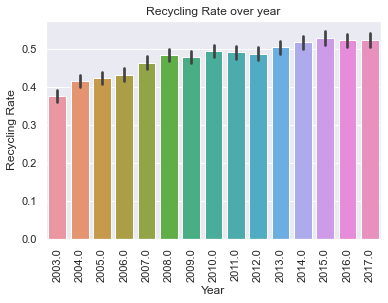

In [48]:
table22=df_final1.toPandas()
sns.set()
plt.figure()

ax = sns.barplot(data=table22, x="Year", y="Recycling Rate")

##Display
ax.set_title('Recycling Rate over year')
ax.set_ylabel('Recycling Rate')
ax.set_xlabel('Year')
ax.set_xticklabels(table22["Year"].unique().astype(str), rotation='vertical')

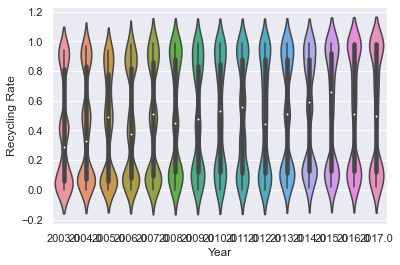

In [50]:
##Total waste recycled
sns.violinplot(x="Year",y="Recycling Rate", 
               data=table22);
plt.show()

In [51]:
df_final1.distinct().count()

210

In [52]:
df_final1 = df_final1.distinct()

In [53]:
from pyspark.ml.feature import StringIndexer


In [54]:
df_final1.columns

['Year',
 'Waste Type',
 'Waste Generated',
 'Waste disposed',
 'Waste Recycled',
 'Recycling Rate']

In [55]:
encode1 = StringIndexer(inputCol='Waste Type', outputCol='Waste Type_code')
encode1_fit= encode1.fit(df_final1)
df_final2= encode1_fit.transform(df_final1)

In [56]:
df_final2.columns

['Year',
 'Waste Type',
 'Waste Generated',
 'Waste disposed',
 'Waste Recycled',
 'Recycling Rate',
 'Waste Type_code']

In [57]:
df_final3 = df_final2.drop('Waste Type')
df_final3.printSchema()

root
 |-- Year: double (nullable = true)
 |-- Waste Generated: double (nullable = true)
 |-- Waste disposed: double (nullable = true)
 |-- Waste Recycled: double (nullable = true)
 |-- Recycling Rate: double (nullable = true)
 |-- Waste Type_code: double (nullable = false)



In [58]:
##Heat Map
heat_map = df_final3.toPandas()
import seaborn as sns

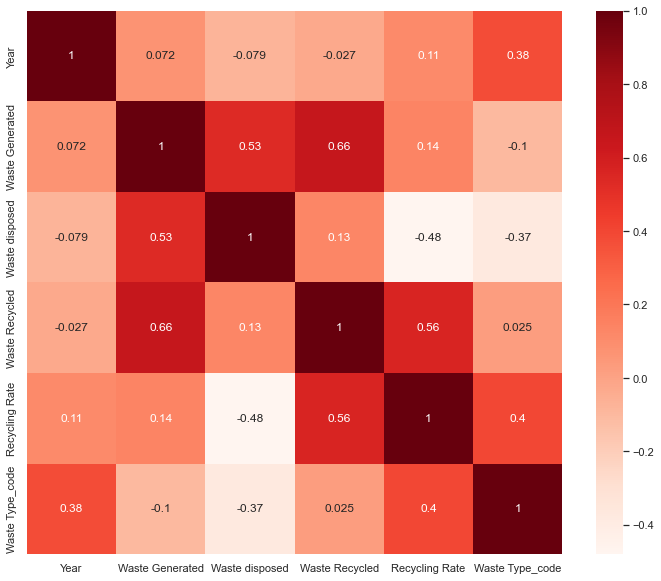

Waste Generated    1.000000
Waste disposed     0.531807
Waste Recycled     0.655250
Recycling Rate     0.140293
Waste Type_code    0.103362
Name: Waste Generated, dtype: float64

In [59]:
heat = heat_map[['Year', 'Waste Generated',
       'Waste disposed',
       'Waste Recycled',
       'Recycling Rate', 'Waste Type_code']]
plt.figure(figsize=(12,10))
cor = heat.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
#Correlation with output variable
cor_target = abs(cor["Waste Generated"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

In [60]:
#Linear Regression Model
df_final3.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Year,210,2010.0,4.330817574228942,2003.0,2017.0
Waste Generated,210,403945.3523809524,347433.93899779173,14400.0,1291800.0
Waste disposed,210,170496.89523809523,197498.0388690675,1300.0,662300.0
Waste Recycled,210,179584.01904761905,222747.14978027,0.0,912400.0
Recycling Rate,210,0.4760476190476186,0.3770917388908945,0.0,0.99
Waste Type_code,210,8.747619047619047,6.925310284283785,0.0,30.0


In [63]:
from pyspark.ml.regression import LinearRegression

# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [71]:
assembler = VectorAssembler(
    inputCols=['Waste disposed',
 'Waste Recycled',
 'Recycling Rate',
 'Waste Type_code', 'Year'],
    outputCol="features")




In [72]:
output2=assembler.transform(df_final3)

In [73]:
output2.head(1)

[Row(Year=2003.0, Waste Generated=548000.0, Waste disposed=515100.0, Waste Recycled=32900.0, Recycling Rate=0.06, Waste Type_code=6.0, features=DenseVector([515100.0, 32900.0, 0.06, 6.0, 2003.0]))]

In [74]:
ff_df=output2.select('features','Waste Generated')

In [75]:
ff_lr=LinearRegression(labelCol='Waste Generated')

In [77]:
ff_fit=ff_lr.fit(ff_df)

In [78]:
print("Waste Generated Coefficients: {} Intercept: {}".format(ff_fit.coefficients,ff_fit.intercept))

Waste Generated Coefficients: [0.8475157208300038,0.9031690991272326,27673.96726021053,143.51833414506515,9683.344148000508] Intercept: -19380699.49080522


In [80]:
##Testing Linear Model
test_results = ff_fit.evaluate(ff_df)

In [81]:
# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

+-------------------+
|          residuals|
+-------------------+
|  64170.00315889716|
| 112371.93075769395|
|  68843.01604881138|
|  548.9025500826538|
|  8250.375911373645|
| 12970.950194027275|
| 43381.348835624754|
|-28503.150054596364|
| -15659.26205072552|
|-2979.1622747033834|
| -7886.825353022665|
|-1685.1420491859317|
|-26379.585894387215|
|  214.9572014696896|
| 52009.850773863494|
| 106097.53600998595|
|  71841.22258034348|
|  225.1939090155065|
| -5781.209714423865|
|-13728.367505155504|
+-------------------+
only showing top 20 rows



In [83]:
# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

R2: 0.6481776114335556


In [85]:
ff_df.describe().show()

+-------+-----------------+
|summary|  Waste Generated|
+-------+-----------------+
|  count|              210|
|   mean|403945.3523809524|
| stddev|347433.9389977916|
|    min|          14400.0|
|    max|        1291800.0|
+-------+-----------------+

